In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [27]:
#Custom Logistic Regression
class CustomLogisticRegression:
    def __init__(self, lr=0.1, epochs=1000, reg_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # add bias column
        self.theta = np.zeros(X.shape[1])
        
        for _ in range(self.epochs):
            z = X @ self.theta
            h = self.sigmoid(z)
            gradient = (X.T @ (h - y)) / len(y)
            reg_term = self.reg_lambda * np.r_[[0], self.theta[1:]]  # no reg for bias
            self.theta -= self.lr * (gradient + reg_term)

    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(X @ self.theta)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

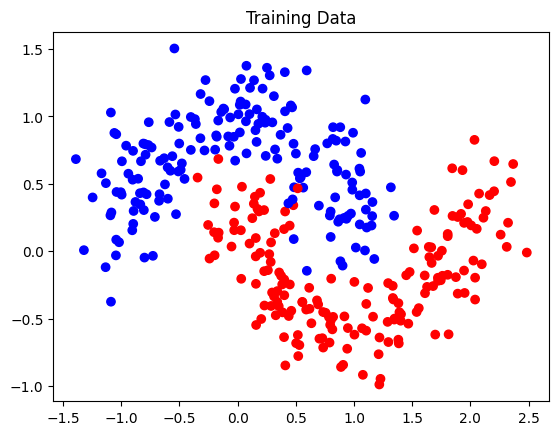

Custom Model Train Acc: 0.9314285714285714
Custom Model Test Acc: 0.9133333333333333
Sklearn Model Train Acc: 0.98
Sklearn Model Test Acc: 0.98


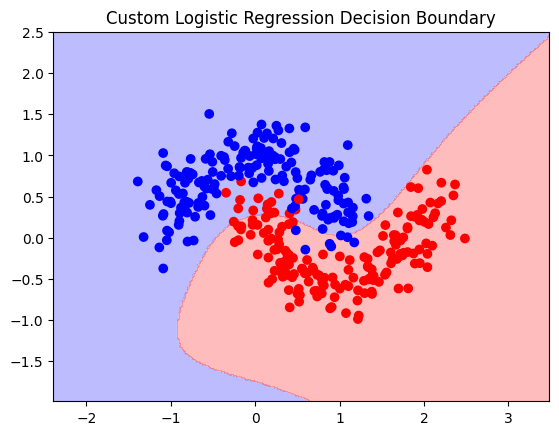

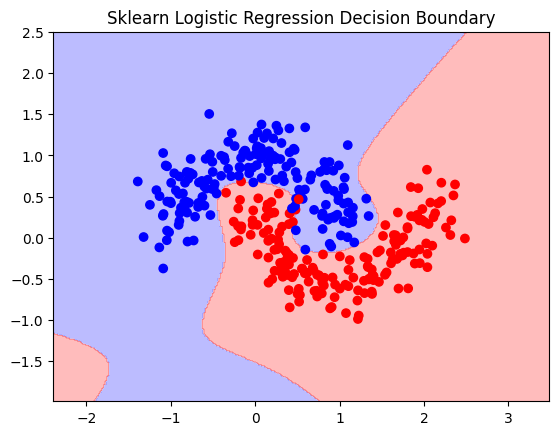

In [28]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.title("Training Data")
plt.show()

#Polynomial Features
degree = 6
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Custom Logistic Regression
model_scratch = CustomLogisticRegression(lr=0.01, epochs=3000, reg_lambda=0.0)
model_scratch.fit(X_train_poly[:, 1:], y_train)  # remove bias term from X_poly

train_preds_scratch = model_scratch.predict(X_train_poly[:, 1:])
test_preds_scratch = model_scratch.predict(X_test_poly[:, 1:])

print("Custom Model Train Acc:", accuracy_score(y_train, train_preds_scratch))
print("Custom Model Test Acc:", accuracy_score(y_test, test_preds_scratch))

#Sklearn Logistic Regression
model_sklearn = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=3000)
model_sklearn.fit(X_train_poly[:, 1:], y_train)

train_preds_sklearn = model_sklearn.predict(X_train_poly[:, 1:])
test_preds_sklearn = model_sklearn.predict(X_test_poly[:, 1:])

print("Sklearn Model Train Acc:", accuracy_score(y_train, train_preds_sklearn))
print("Sklearn Model Test Acc:", accuracy_score(y_test, test_preds_sklearn))

#Desicion Boundary
def plot_decision_boundary(model, X, y, title, is_scratch=True):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid)

    if is_scratch:
        Z = model.predict(grid_poly[:, 1:])
    else:
        Z = model.predict(grid_poly[:, 1:])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title(title)
    plt.show()

#Plot Custom Model
plot_decision_boundary(model_scratch, X_train, y_train, "Custom Logistic Regression Decision Boundary", is_scratch=True)

# Plot Sklearn Model
plot_decision_boundary(model_sklearn, X_train, y_train, "Sklearn Logistic Regression Decision Boundary", is_scratch=False)

In [29]:
#Custom Logistic Regression 
print("Custom Logistic Regression without Polynomial Features:")
scratch_model = CustomLogisticRegression(lr=0.1, epochs=1000, reg_lambda=0.0)
scratch_model.fit(X_train, y_train)

train_preds_scratch = scratch_model.predict(X_train)
test_preds_scratch = scratch_model.predict(X_test)

scratch_train_acc = accuracy_score(y_train, train_preds_scratch)
scratch_test_acc = accuracy_score(y_test, test_preds_scratch)

print(f"Custom Model - Train Accuracy: {scratch_train_acc:.3f}")
print(f"Custom Model - Test Accuracy: {scratch_test_acc:.3f}")

print("\n-----------------------------------\n")

#Sklearn Logistic Regression
print("Sklearn Logistic Regression without Polynomial Features:")
sklearn_model = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=3000)
sklearn_model.fit(X_train, y_train)

train_preds_sklearn = sklearn_model.predict(X_train)
test_preds_sklearn = sklearn_model.predict(X_test)

sklearn_train_acc = accuracy_score(y_train, train_preds_sklearn)
sklearn_test_acc = accuracy_score(y_test, test_preds_sklearn)

print(f"Sklearn Model - Train Accuracy: {sklearn_train_acc:.3f}")
print(f"Sklearn Model - Test Accuracy: {sklearn_test_acc:.3f}")


Custom Logistic Regression without Polynomial Features:
Custom Model - Train Accuracy: 0.854
Custom Model - Test Accuracy: 0.867

-----------------------------------

Sklearn Logistic Regression without Polynomial Features:
Sklearn Model - Train Accuracy: 0.857
Sklearn Model - Test Accuracy: 0.867


Testing for overfitting using different degrees

Logistic Regression with Polynomial Features without regularization:
Degree 1 - Custom Train Acc: 0.857, Test Acc: 0.867
Degree 1 - Sklearn Train Acc: 0.857, Test Acc: 0.867
Degree 2 - Custom Train Acc: 0.851, Test Acc: 0.860
Degree 2 - Sklearn Train Acc: 0.854, Test Acc: 0.853
Degree 4 - Custom Train Acc: 0.960, Test Acc: 0.953
Degree 4 - Sklearn Train Acc: 0.983, Test Acc: 0.973
Degree 6 - Custom Train Acc: 0.971, Test Acc: 0.973
Degree 6 - Sklearn Train Acc: 0.980, Test Acc: 0.980
Degree 8 - Custom Train Acc: 0.974, Test Acc: 0.960
Degree 8 - Sklearn Train Acc: 0.991, Test Acc: 0.967


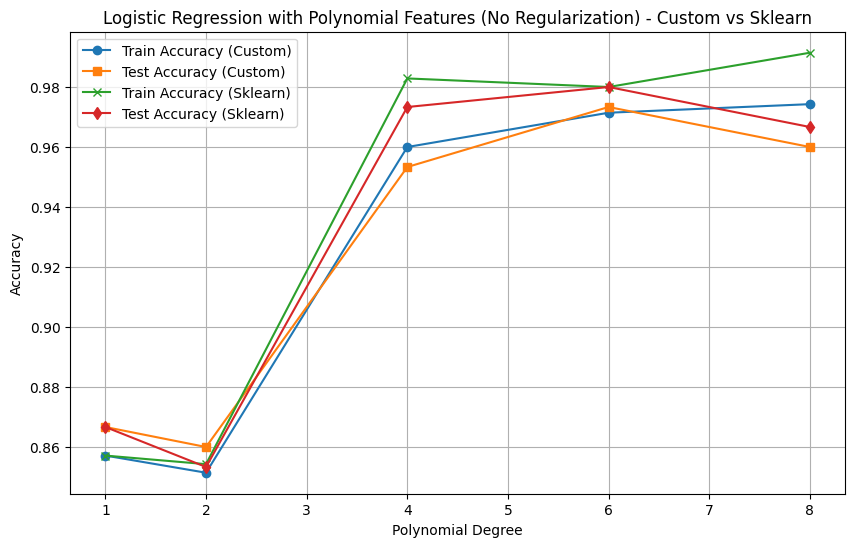

In [30]:
#Variables to store the accuracies for plotting
degrees = [1, 2, 4, 6, 8]
train_accuracies_scratch = []
test_accuracies_scratch = []
train_accuracies_sklearn = []
test_accuracies_sklearn = []

# Testing for different polynomial degrees
print("Logistic Regression with Polynomial Features without regularization:")
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    #Custom Logistic Regression model
    model_scratch = CustomLogisticRegression(lr=0.1, epochs=2000, reg_lambda=0.0)
    model_scratch.fit(X_poly_train[:, 1:], y_train)  # remove bias column

    #Training and testing accuracies for custom model
    train_acc_scratch = accuracy_score(y_train, model_scratch.predict(X_poly_train[:, 1:]))
    test_acc_scratch = accuracy_score(y_test, model_scratch.predict(X_poly_test[:, 1:]))

    #Append to lists for scratch model
    train_accuracies_scratch.append(train_acc_scratch)
    test_accuracies_scratch.append(test_acc_scratch)

    #Sklearn Logistic Regression Model
    model_sklearn = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=3000)
    model_sklearn.fit(X_poly_train[:, 1:], y_train)  # remove bias column for consistency

    #Training and testing accuracies for sklearn model
    train_acc_sklearn = accuracy_score(y_train, model_sklearn.predict(X_poly_train[:, 1:]))
    test_acc_sklearn = accuracy_score(y_test, model_sklearn.predict(X_poly_test[:, 1:]))

    #Append to lists for sklearn model
    train_accuracies_sklearn.append(train_acc_sklearn)
    test_accuracies_sklearn.append(test_acc_sklearn)

    print(f"Degree {degree} - Custom Train Acc: {train_acc_scratch:.3f}, Test Acc: {test_acc_scratch:.3f}")
    print(f"Degree {degree} - Sklearn Train Acc: {train_acc_sklearn:.3f}, Test Acc: {test_acc_sklearn:.3f}")

#Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies_scratch, label="Train Accuracy (Custom)", marker='o')
plt.plot(degrees, test_accuracies_scratch, label="Test Accuracy (Custom)", marker='s')
plt.plot(degrees, train_accuracies_sklearn, label="Train Accuracy (Sklearn)", marker='x')
plt.plot(degrees, test_accuracies_sklearn, label="Test Accuracy (Sklearn)", marker='d')

plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.title("Logistic Regression with Polynomial Features (No Regularization) - Custom vs Sklearn")
plt.legend()
plt.grid(True)
plt.show()


Regularization effect on Logistic Regression with Polynomial Features with degree = 6

Regularization Effect with degree = 6:
Lambda 0.0   - Scratch Train Acc: 0.931, Test Acc: 0.913
Lambda 0.0   - Sklearn Train Acc: 0.980, Test Acc: 0.980
Lambda 0.1   - Scratch Train Acc: 0.900, Test Acc: 0.907
Lambda 0.1   - Sklearn Train Acc: 0.983, Test Acc: 0.973
Lambda 1.0   - Scratch Train Acc: 0.737, Test Acc: 0.793
Lambda 1.0   - Sklearn Train Acc: 0.974, Test Acc: 0.973
Lambda 10.0  - Scratch Train Acc: 0.711, Test Acc: 0.740
Lambda 10.0  - Sklearn Train Acc: 0.951, Test Acc: 0.960
Lambda 100.0 - Scratch Train Acc: 0.683, Test Acc: 0.707
Lambda 100.0 - Sklearn Train Acc: 0.829, Test Acc: 0.833


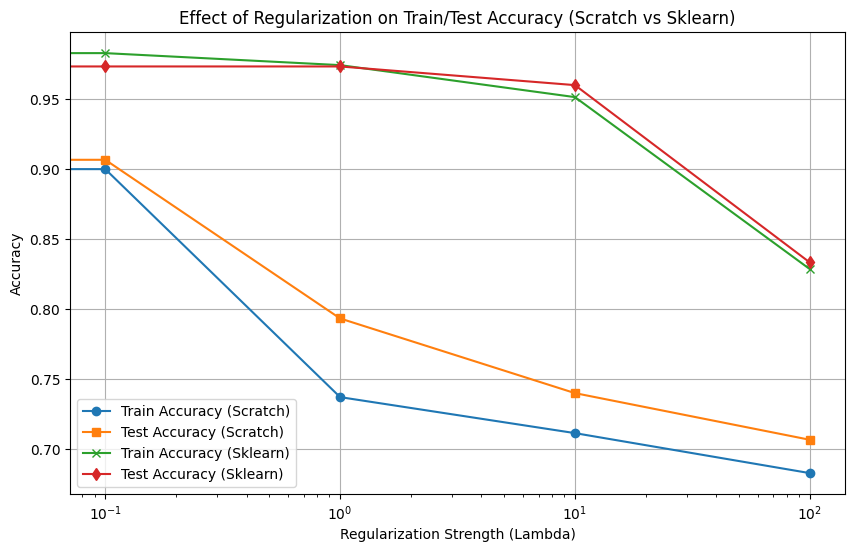

In [31]:
print("Regularization Effect with degree = 6:")
degree = 6
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

#Different regularization strengths
lambdas = [0.0, 0.1, 1.0, 10.0, 100.0]  

#storing accuracies
train_accuracies_scratch = []
test_accuracies_scratch = []
train_accuracies_sklearn = []
test_accuracies_sklearn = []

for reg_lambda in lambdas:
    
    #Custom model with regularization
    model_scratch = CustomLogisticRegression(lr=0.01, epochs=3000, reg_lambda=reg_lambda)
    model_scratch.fit(X_poly_train[:, 1:], y_train)

    train_acc_scratch = accuracy_score(y_train, model_scratch.predict(X_poly_train[:, 1:]))
    test_acc_scratch = accuracy_score(y_test, model_scratch.predict(X_poly_test[:, 1:]))

    #Append to lists for custom model
    train_accuracies_scratch.append(train_acc_scratch)
    test_accuracies_scratch.append(test_acc_scratch)


    #Sklearn Logistic Regression with regularization
    
    #Preventing division by zero when reg_lambda is 0
    if reg_lambda == 0.0:
        C_value = 1e10  #Set a large value for C (no regularization)
    else:
        C_value = 1 / reg_lambda  #Regularization strength for sklearn

    model_sklearn = LogisticRegression(penalty='l2', C=C_value, solver='lbfgs', max_iter=3000)
    model_sklearn.fit(X_poly_train[:, 1:], y_train)

    train_acc_sklearn = accuracy_score(y_train, model_sklearn.predict(X_poly_train[:, 1:]))
    test_acc_sklearn = accuracy_score(y_test, model_sklearn.predict(X_poly_test[:, 1:]))

    #Append to lists for sklearn model
    train_accuracies_sklearn.append(train_acc_sklearn)
    test_accuracies_sklearn.append(test_acc_sklearn)

    print(f"Lambda {reg_lambda:<5} - Scratch Train Acc: {train_acc_scratch:.3f}, Test Acc: {test_acc_scratch:.3f}")
    print(f"Lambda {reg_lambda:<5} - Sklearn Train Acc: {train_acc_sklearn:.3f}, Test Acc: {test_acc_sklearn:.3f}")

#Plotting the accuracies for all 
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_accuracies_scratch, label="Train Accuracy (Scratch)", marker='o')
plt.plot(lambdas, test_accuracies_scratch, label="Test Accuracy (Scratch)", marker='s')
plt.plot(lambdas, train_accuracies_sklearn, label="Train Accuracy (Sklearn)", marker='x')
plt.plot(lambdas, test_accuracies_sklearn, label="Test Accuracy (Sklearn)", marker='d')

plt.xscale('log')
plt.xlabel('Regularization Strength (Lambda)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Train/Test Accuracy (Scratch vs Sklearn)')
plt.legend()
plt.grid(True)
plt.show()


Testing with breast cancer dataset

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

#Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

#Standardize features for better gradient descent behavior
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [33]:
#Sklearn model
model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Sklearn Logistic Regression:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

#Custom model
model_scratch = CustomLogisticRegression(lr=0.01, epochs=3000)
model_scratch.fit(X_train, y_train)

y_pred_train_scratch = model_scratch.predict(X_train)
y_pred_test_scratch = model_scratch.predict(X_test)

print("Scratch Logistic Regression:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_scratch))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_scratch))


Sklearn Logistic Regression:
Train Accuracy: 1.0
Test Accuracy: 0.9590643274853801
Scratch Logistic Regression:
Train Accuracy: 0.9824120603015075
Test Accuracy: 0.9941520467836257


In [34]:
#adding polynomial features
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    #Sklearn model
    model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=10000)
    model.fit(X_poly_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_poly_train))
    test_acc = accuracy_score(y_test, model.predict(X_poly_test))

    print(f"Degree {degree} - Sklearn Train Acc: {train_acc:.3f}, Sklearn Test Acc: {test_acc:.3f}")
    
    #Custom model
    custom_model = CustomLogisticRegression(lr=0.01, epochs=3000)
    custom_model.fit(X_poly_train, y_train)

    custom_train_acc = accuracy_score(y_train, custom_model.predict(X_poly_train))
    custom_test_acc = accuracy_score(y_test, custom_model.predict(X_poly_test))

    print(f"Degree {degree} - Custom Train Acc: {custom_train_acc:.3f}, Custom Test Acc: {custom_test_acc:.3f}")


Degree 1 - Train Acc: 1.000, Test Acc: 0.942
Degree 1 - Train Acc: 0.980, Test Acc: 0.994
Degree 2 - Train Acc: 1.000, Test Acc: 0.947
Degree 2 - Train Acc: 0.992, Test Acc: 0.959
Degree 3 - Train Acc: 1.000, Test Acc: 0.971
Degree 3 - Train Acc: 1.000, Test Acc: 0.982
Degree 4 - Train Acc: 1.000, Test Acc: 0.965
Degree 4 - Train Acc: 1.000, Test Acc: 0.965


In [35]:
#Adding regularization to combat overfitting

degree = 4 
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

#remove bias term if needed by custom model
X_poly_train_nobias = X_poly_train[:, 1:]
X_poly_test_nobias = X_poly_test[:, 1:]

lambdas = [0.0, 0.1, 1.0, 10.0, 100.0]

print("Regularization Comparison with Degree = 4:")
for reg_lambda in lambdas:
    
    #Custom model
    custom_model = CustomLogisticRegression(lr=0.01, epochs=3000, reg_lambda=reg_lambda)
    custom_model.fit(X_poly_train_nobias, y_train)

    train_acc_custom = accuracy_score(y_train, custom_model.predict(X_poly_train_nobias))
    test_acc_custom = accuracy_score(y_test, custom_model.predict(X_poly_test_nobias))

    #Sklearn model (C = 1 / lambda)
    if reg_lambda == 0.0:
        C = 1e10  #effectively no regularization
    else:
        C = 1 / reg_lambda

    sklearn_model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=10000)
    sklearn_model.fit(X_poly_train_nobias, y_train)

    train_acc_sklearn = accuracy_score(y_train, sklearn_model.predict(X_poly_train_nobias))
    test_acc_sklearn = accuracy_score(y_test, sklearn_model.predict(X_poly_test_nobias))

    print(f"Lambda {reg_lambda:<5} | Scratch Train: {train_acc_custom:.3f}, Test: {test_acc_custom:.3f} || "
          f"Sklearn Train: {train_acc_sklearn:.3f}, Test: {test_acc_sklearn:.3f}")


Regularization Comparison with Degree = 4:
Lambda 0.0   | Scratch Train: 1.000, Test: 0.965 || Sklearn Train: 1.000, Test: 0.959
Lambda 0.1   | Scratch Train: 1.000, Test: 0.942 || Sklearn Train: 1.000, Test: 0.959
Lambda 1.0   | Scratch Train: 0.985, Test: 0.930 || Sklearn Train: 1.000, Test: 0.942
Lambda 10.0  | Scratch Train: 0.932, Test: 0.883 || Sklearn Train: 1.000, Test: 0.947
Lambda 100.0 | Scratch Train: 0.626, Test: 0.632 || Sklearn Train: 0.990, Test: 0.930
